In [86]:
#Reference:
#https://www.kaggle.com/ashydv/sales-prediction-simple-linear-regression
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
#https://www.kaggle.com/vipulgandhi/linear-regression
#https://www.kaggle.com/vipulgandhi/statistics-for-every-data-scientist

In [1]:
import os
os.getcwd()

'C:\\Users\\namrata\\AI practice\\AI Projects'

In [2]:
os.chdir("C:/Users/namrata/Desktop/projects/salesad")

In [3]:
os.getcwd()

'C:\\Users\\namrata\\Desktop\\projects\\salesad'

In [4]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [5]:
data = pd.read_csv('advertising.csv')

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

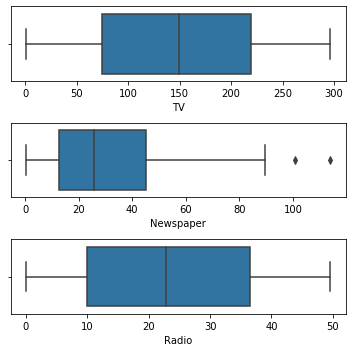

In [10]:
#Outlier analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

In [11]:
s,t1,r,n=data['Sales'],data['TV'],data['Radio'],data['Newspaper']

In [12]:
t1.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

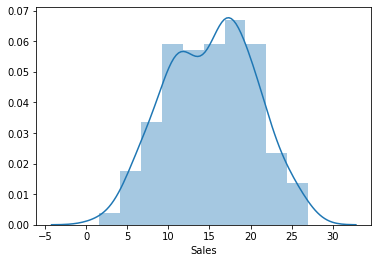

In [13]:
sns.distplot(data['Sales'],hist = True)

Text(0, 0.5, 'Sales')

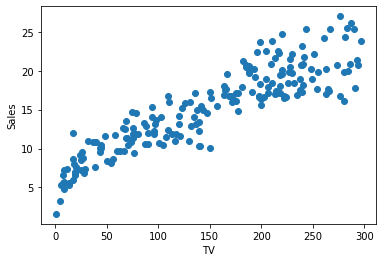

In [14]:
plt.scatter(t1,s)
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

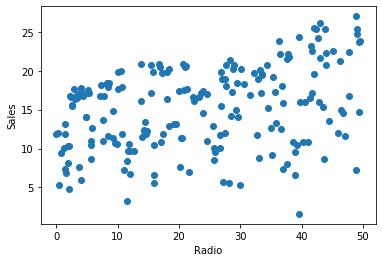

In [15]:
plt.scatter(r,s)
plt.xlabel('Radio')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

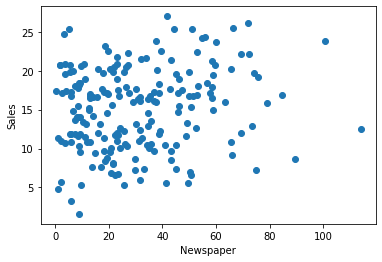

In [16]:
plt.scatter(n,s)
plt.xlabel('Newspaper')
plt.ylabel('Sales')

C:\Users\namrata\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


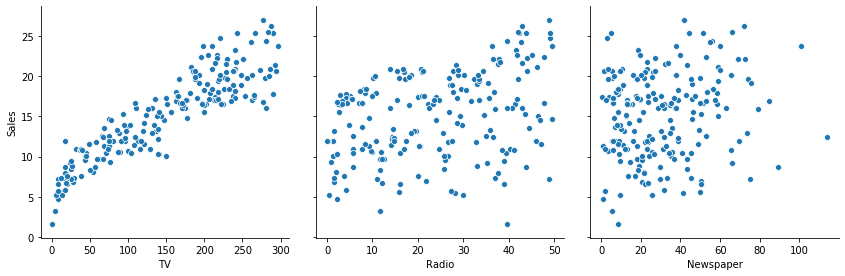

In [42]:
# visualize the relationship between the features and the target using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 4, aspect = 1)

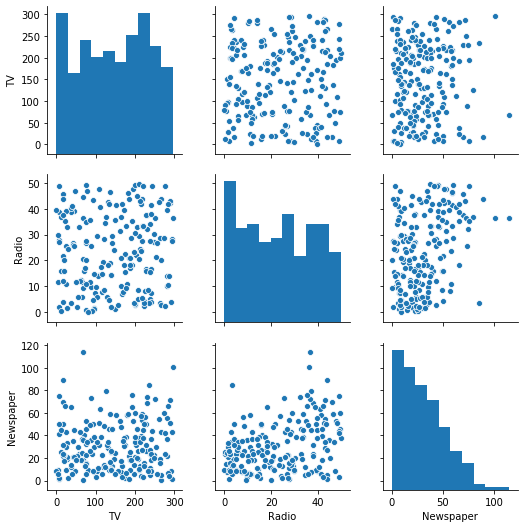

In [44]:
sns.pairplot(data[['TV','Radio','Newspaper']])

In [1]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()


NameError: name 'sns' is not defined

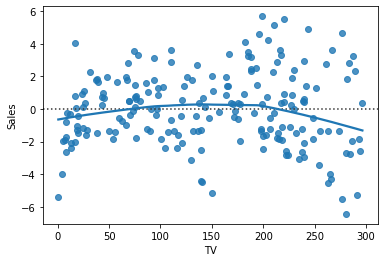

In [47]:
# This function will regress y on x and then draw a scatterplot of the residuals.

sns.residplot(x = data['TV'], y = data["Sales"], lowess = True)

In [18]:
#using scikit-learn linear regression model
#https://www.kaggle.com/ashydv/sales-prediction-simple-linear-regression
X = data['TV']
y = data['Sales']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
#refernce: https://www.kaggle.com/waseemir/linear-regression-statsmodels
import statsmodels.api as sm

X_train_sm=sm.add_constant(X_train)
#By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below
lr=sm.OLS(y_train,X_train_sm).fit()

C:\Users\namrata\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [22]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        13:45:17   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
'''Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.'''

"Looking at some key statistics from the summary\nThe values we are concerned with are -\n\nThe coefficients and significance (p-values)\nR-squared\nF statistic and its significance\n1. The coefficient for TV is 0.054, with a very low p value\nThe coefficient is statistically significant. So the association is not purely by chance.\n\n2. R - squared is 0.816\nMeaning that 81.6% of the variance in Sales is explained by TV\n\nThis is a decent R-squared value.\n\n3. F statistic has a very low p value (practically low)\nMeaning that the model fit is statistically significant, and the explained variance isn't purely by chance."

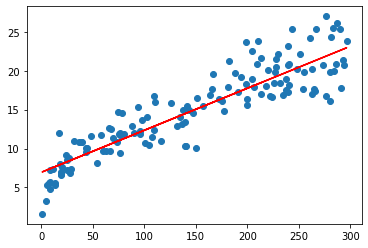

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

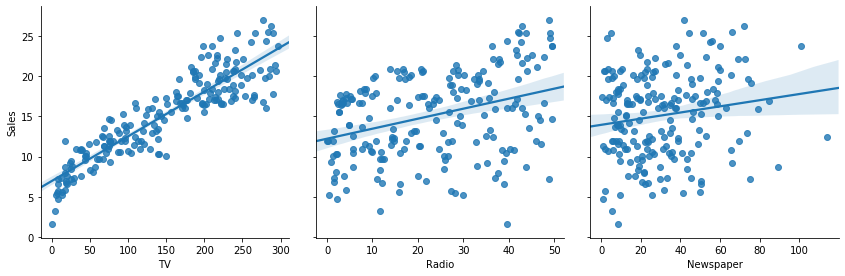

In [48]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=4, aspect = 1, kind='reg')

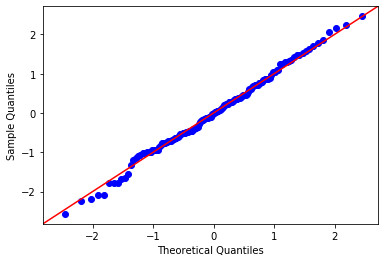

In [50]:
Ststsmodels_residual = lr.resid
ax = sm.qqplot(Ststsmodels_residual, fit = True, line = "45")

In [51]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lr.conf_int()

,0,1
const,6.188252,7.709114
TV,0.050183,0.058908


In [52]:
### STATSMODELS ###

# print the p-values for the model coefficients
lr.pvalues

const    3.456118e-38
TV       1.516345e-52
dtype: float64

In [25]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

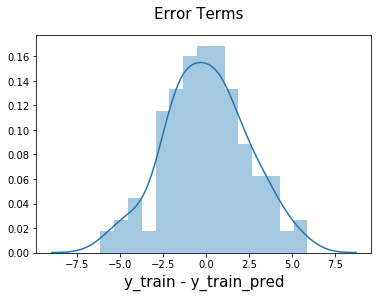

In [26]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [27]:
#Predictions on the Test Set
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [28]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
#Looking at the RMSE
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

In [31]:
#Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245657

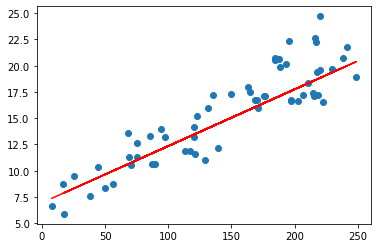

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [33]:
#Linear regression model using scikit-learn
# Dropping any rows with Nan values 
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [34]:
#reshape
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
regr.score(X_test, y_test) #R squared pn test  for model

0.792103160124566

In [36]:
regr.score(X_train, y_train)

0.8157933136480388

In [37]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)

[6.9486832]
[[0.05454575]]


In [38]:
y_pred = regr.predict(X_test)

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6480589869746525
Mean Squared Error: 4.07755637182695
Root Mean Squared Error: 2.0192960089662315


In [40]:
#optimize the linear regression using gradient descent and normal equation